Hough circles ipython notebook

In [1]:
""" Do some common imports """
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline
from pylab import rcParams
from helpers import scaled_resize
rcParams['figure.figsize'] = 15, 15

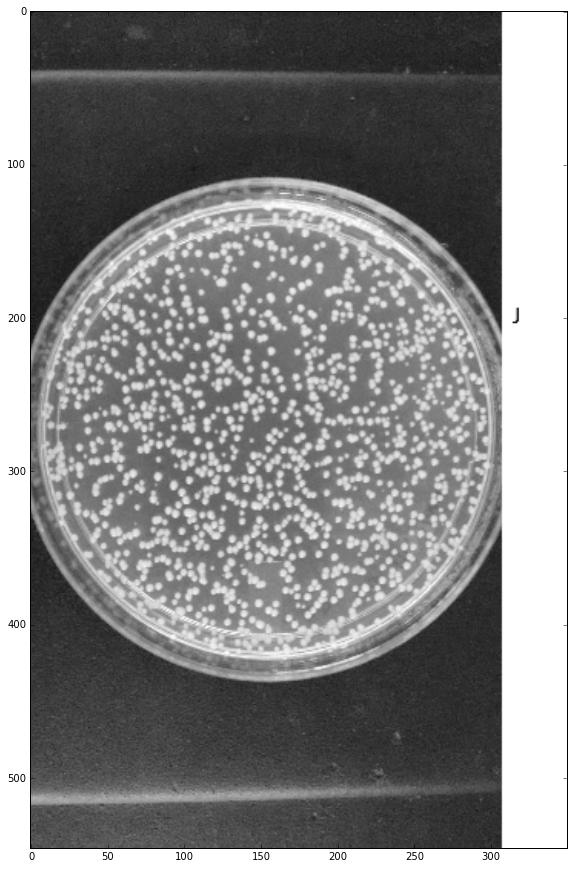

In [2]:
input_file = 'images/set1/J_1036.jpg'

img_gray = scaled_resize(cv2.imread(input_file, 0), 350)
img = scaled_resize(cv2.imread(input_file), 350)

plt.imshow(img_gray, cmap='gray')

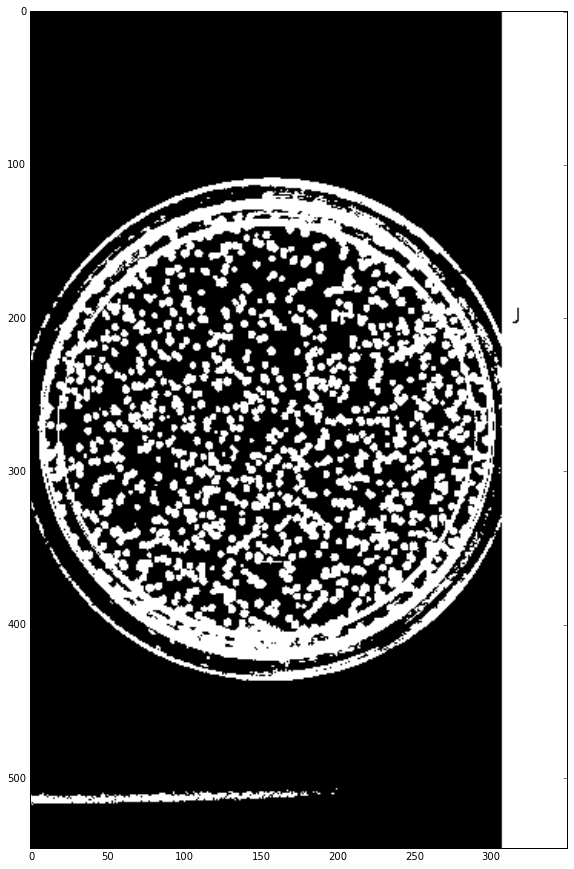

In [3]:
rng,img_gray = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(img_gray, cmap='gray')

Also let's try and compare the contour based approach

In [4]:
contours, hier = cv2.findContours(img_gray,mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_NONE)
print len(contours)
cv2.drawContours(img, contours, -1, 255, 2)

680


In [5]:
""" Apply gaussian blur transform procedure here """
#img_gray = cv2.GaussianBlur(img_gray, (9, 9), 2, 2)
#plt.imshow(img_gray, cmap='gray')

' Apply gaussian blur transform procedure here '

In [6]:
contours, hier = cv2.findContours(img_gray,mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_NONE)
print len(contours)
cv2.drawContours(img, contours, -1, 255, 2)

680


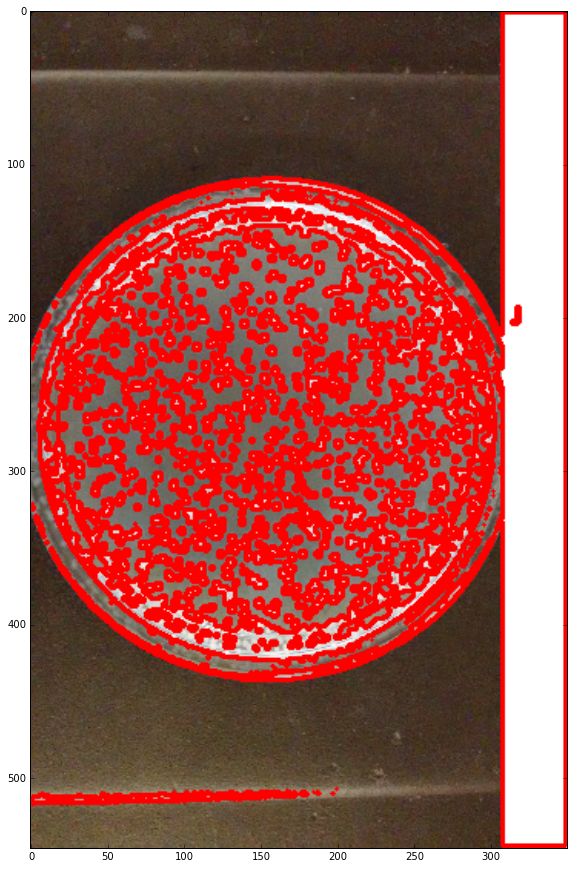

In [7]:
plt.imshow(img, cmap='gray')

In [8]:
areas = np.array([cv2.contourArea(cnt) for cnt in contours])
print areas.sum()/areas.mean()

680.0
